<a href="https://colab.research.google.com/github/JakubJU/1/blob/main/zadanie_1i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, auc, roc_curve, roc_auc_score

In [ ]:
def triangle(): # zwraca punk w trójkącie (c=1) lub poza nim (c=0)
    x1=random.random()
    x2=random.random()
    if (1.2-x1-x2>0) and (-0.2+x1>0) and (-0.2+x2)>0: # koniunkcja trzech warunków
        c=1
    else:
        c=0
    return np.array([x1,x2,c])

In [ ]:
sample=np.array([triangle() for i in range(6000)])
print(sample.shape)

(6000, 3)


In [ ]:
def draw_result(X,y):
  fig=plt.figure(figsize=(5,5))
  # dorysowanie okręgu
  #ax=fig.add_subplot(1,1,1)
  #circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
  #ax.add_patch(circ)

  plt.title("Działanie na próbce testowej",fontsize=14)
  plt.xlim(min(X[:,0]),max(X[:,0]))
  plt.ylim(min(X[:,1]),max(X[:,1]))
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.xlabel('$x_1$',fontsize=18)
  plt.ylabel('$x_2$',fontsize=18);

Shapes of datasets X_train (4200, 2), X_test (1800, 2), y_train (4200,), y_test (1800,): 


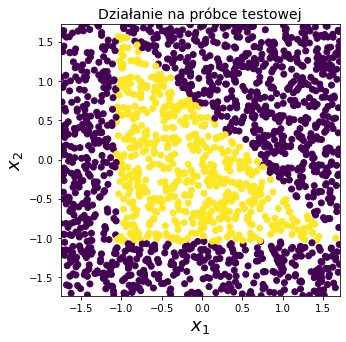

In [ ]:
X,y = sample[:,:2],sample[:,2]

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Shapes of datasets X_train {}, X_test {}, y_train {}, y_test {}: ".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

draw_result(X_test,y_test)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', alpha=0.1, 
                    learning_rate_init=0.01, early_stopping=True,validation_fraction=0.2,verbose=True,n_iter_no_change=100,max_iter=1000)

print(clf.fit(X_train,y_train))
score = clf.score(X_test,y_test)
print('score = {}'.format(score)) 
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = 0.73043148
Validation score: 0.671429
Iteration 2, loss = 0.62549345
Validation score: 0.671429
Iteration 3, loss = 0.60206562
Validation score: 0.671429
Iteration 4, loss = 0.58419036
Validation score: 0.658333
Iteration 5, loss = 0.55907308
Validation score: 0.727381
Iteration 6, loss = 0.51904125
Validation score: 0.878571
Iteration 7, loss = 0.46482898
Validation score: 0.890476
Iteration 8, loss = 0.40764287
Validation score: 0.903571
Iteration 9, loss = 0.35536271
Validation score: 0.919048
Iteration 10, loss = 0.31038839
Validation score: 0.933333
Iteration 11, loss = 0.26903593
Validation score: 0.940476
Iteration 12, loss = 0.23369748
Validation score: 0.957143
Iteration 13, loss = 0.20205765
Validation score: 0.971429
Iteration 14, loss = 0.17940844
Validation score: 0.966667
Iteration 15, loss = 0.16160577
Validation score: 0.976190
Iteration 16, loss = 0.14896256
Validation score: 0.970238
Iteration 17, loss = 0.13946422
Validation score: 0.982143
Iterat

[0.6714285714285714, 0.6714285714285714, 0.6714285714285714, 0.6583333333333333, 0.7273809523809524, 0.8785714285714286, 0.8904761904761904, 0.9035714285714286, 0.919047619047619, 0.9333333333333333, 0.9404761904761905, 0.9571428571428572, 0.9714285714285714, 0.9666666666666667, 0.9761904761904762, 0.9702380952380952, 0.9821428571428571, 0.9809523809523809, 0.9797619047619047, 0.9785714285714285, 0.975, 0.9761904761904762, 0.975, 0.9833333333333333, 0.9833333333333333, 0.9845238095238096, 0.9833333333333333, 0.9857142857142858, 0.9809523809523809, 0.986904761904762, 0.9833333333333333, 0.9857142857142858, 0.9857142857142858, 0.9833333333333333, 0.9857142857142858, 0.9880952380952381, 0.9892857142857143, 0.9845238095238096, 0.9845238095238096, 0.9845238095238096, 0.9845238095238096, 0.9809523809523809, 0.9845238095238096, 0.9845238095238096, 0.9892857142857143, 0.9797619047619047, 0.986904761904762, 0.9892857142857143, 0.9880952380952381, 0.9892857142857143, 0.9916666666666667, 0.984523

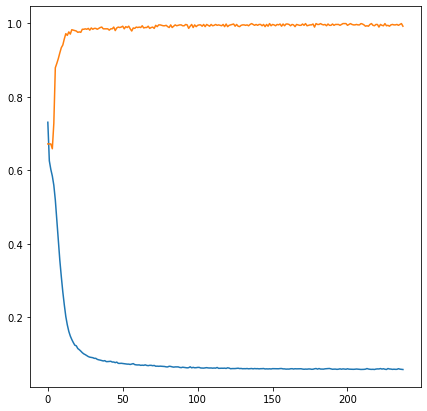

In [ ]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

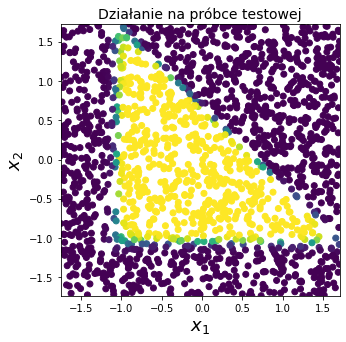

In [ ]:
draw_result(X_test, Z)

<Figure size 504x504 with 0 Axes>

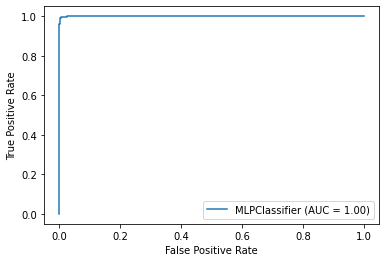

Area Under Curve AUC =  0.9998350157386301
Area Under Curve AUC =  0.9998350157386301


In [ ]:
fig=plt.figure(figsize=(7,7))

roc_disp = plot_roc_curve(clf, X_test, y_test)

plt.show()

#Print AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area Under Curve AUC = ",roc_auc)

#simpler method
print("Area Under Curve AUC = ",roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

zad 2

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split

####################################################
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


In [ ]:
# train the model

clf = MLPClassifier(hidden_layer_sizes=(100,50),solver='adam',verbose=10,early_stopping=True)
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test)
score2 = clf.score(X_train,y_train)
print(score)
print(score2)

Iteration 1, loss = inf
Validation score: 0.465116
Iteration 2, loss = inf
Validation score: 0.116279
Iteration 3, loss = 102.01346851
Validation score: 0.174419
Iteration 4, loss = 122.61274157
Validation score: 0.465116
Iteration 5, loss = 72.11492532
Validation score: 0.453488
Iteration 6, loss = 82.43196219
Validation score: 0.453488
Iteration 7, loss = 56.60143034
Validation score: 0.511628
Iteration 8, loss = 34.29964062
Validation score: 0.441860
Iteration 9, loss = 36.76864182
Validation score: 0.418605
Iteration 10, loss = 20.09422014
Validation score: 0.325581
Iteration 11, loss = 16.35621355
Validation score: 0.360465
Iteration 12, loss = 17.72993192
Validation score: 0.383721
Iteration 13, loss = 11.84711306
Validation score: 0.430233
Iteration 14, loss = 11.71280617
Validation score: 0.534884
Iteration 15, loss = 11.60268673
Validation score: 0.430233
Iteration 16, loss = 13.26103360
Validation score: 0.325581
Iteration 17, loss = 14.34863891
Validation score: 0.360465
Ite

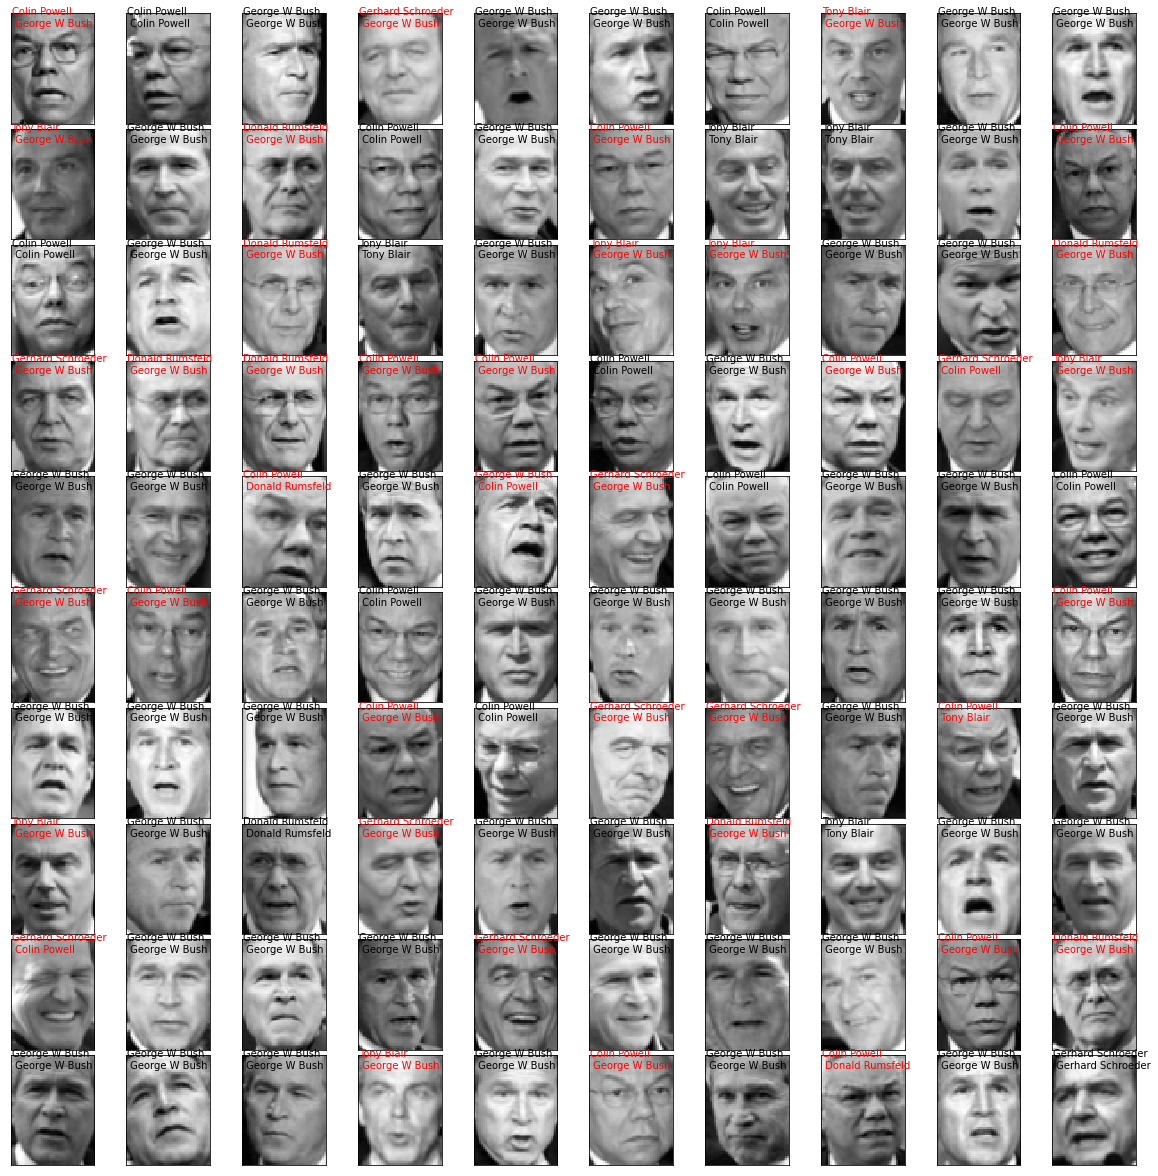

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target valu
  #ax.text(0, 7, str(target_names[y_test[i]]))
  predicted = clf.predict(X_test)
  expected = y_test
  if str(target_names[expected[i]]) != str(target_names[predicted[i]]):
    ax.text(0, 7, str(target_names[expected[i]])+"\n "+str(target_names[predicted[i]]), color='red')
  else:
    ax.text(0, 7, str(target_names[expected[i]])+"\n "+str(target_names[predicted[i]]), color='black')

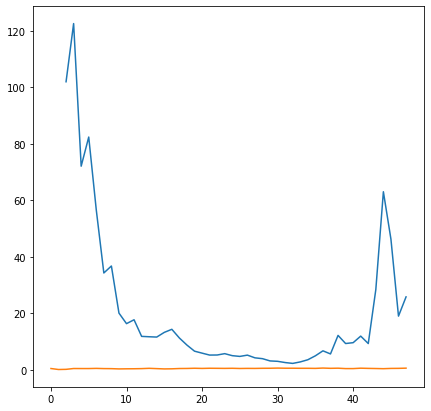

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(clf.loss_curve_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.72      0.45      0.56        64
           1       0.67      0.12      0.21        32
           2       0.56      0.97      0.71       127
           3       1.00      0.10      0.19        29
           4       0.73      0.33      0.46        33

    accuracy                           0.60       285
   macro avg       0.74      0.40      0.42       285
weighted avg       0.67      0.60      0.54       285



In [ ]:
print(metrics.confusion_matrix(expected, predicted))

[[ 29   2  32   0   1]
 [  5   4  23   0   0]
 [  4   0 123   0   0]
 [  2   0  21   3   3]
 [  0   0  22   0  11]]
